<a href="https://colab.research.google.com/github/falyseck/linear_regression_model/blob/main/summative/linear_regression/multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# social_media_regression.py
# Pipeline: EDA, feature engineering, regression models, evaluation, save best model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import warnings
import os
from google.colab import files


In [ ]:
warnings.filterwarnings('ignore')
sns.set(style='whitegrid', rc={'figure.figsize':(9,6)})

In [ ]:
df = pd.read_csv('/content/students_sm_addiction.csv')
print("Rows, Columns:", df.shape)
df.head()

Rows, Columns: (705, 13)


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
print(df.isnull().sum())
print(df.describe)

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64
<bound method NDFrame.describe of      Student_ID  Age  Gender Academic_Level     Country  \
0             1   19  Female  Undergraduate  Bangladesh   
1             2   22    Male       Graduate       India   
2             3   20  Female  Undergraduate         USA   
3             4   18    Male    High School          UK   
4             5   21    Male       Graduate      Canada   
..          ...  ...     ...            ...         ...   
700         701   20  Female  Undergraduate       Italy   
701         702   23    Male       Grad

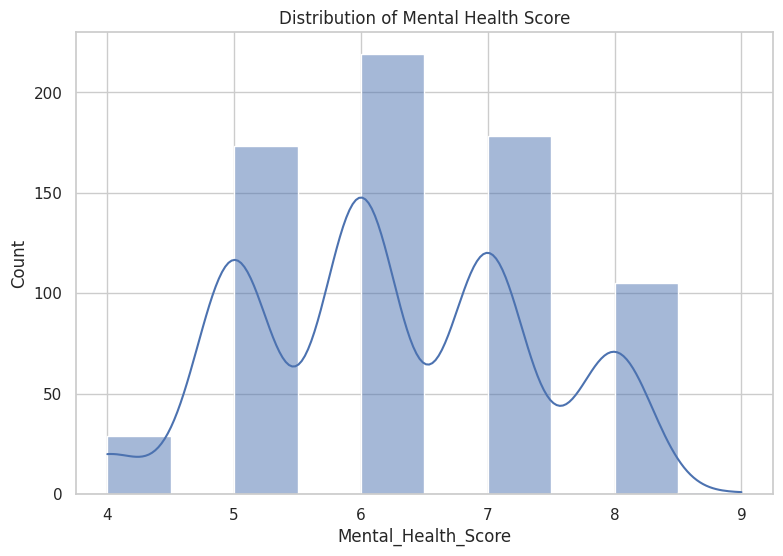

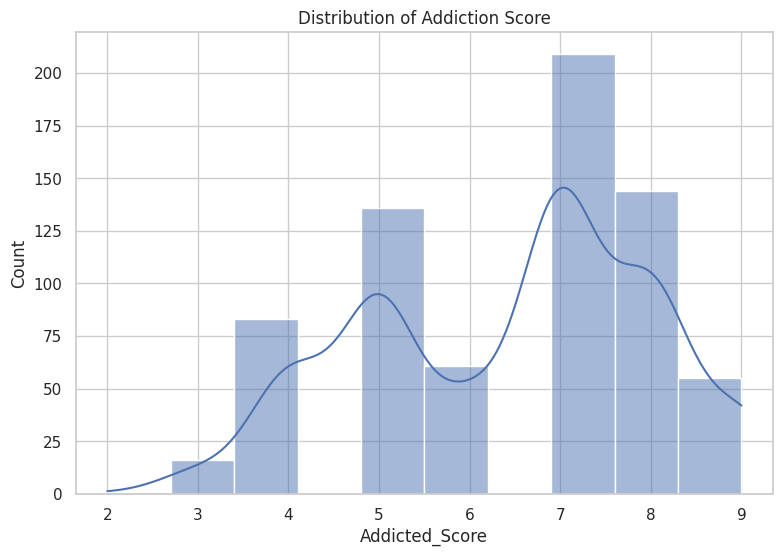

In [ ]:
# Distribution of Mental Health Score
sns.histplot(df['Mental_Health_Score'], bins=10, kde=True)
plt.title("Distribution of Mental Health Score")
plt.show()
# Distribution of Addiction Score
sns.histplot(df['Addicted_Score'], bins=10, kde=True)
plt.title("Distribution of Addiction Score")
plt.show()


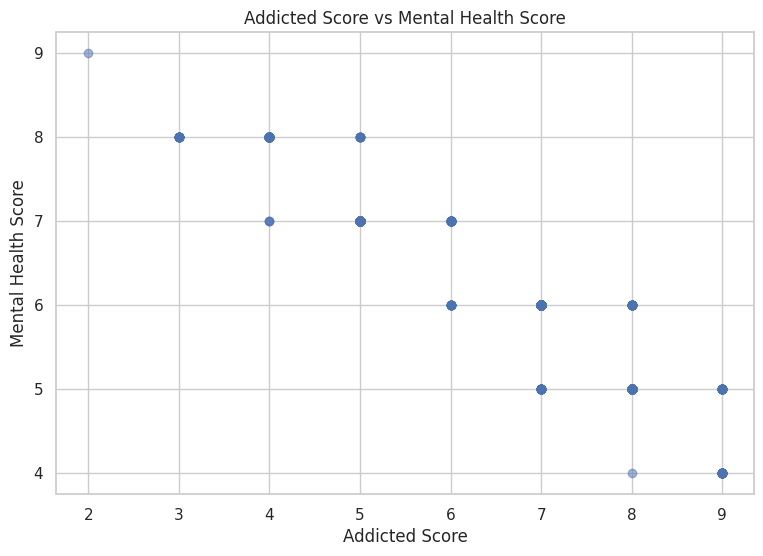

In [ ]:

# Scatter plot: Addiction Score vs Mental Health Score
plt.scatter(df['Addicted_Score'], df['Mental_Health_Score'], alpha=0.5)
plt.xlabel("Addicted Score")
plt.ylabel("Mental Health Score")
plt.title("Addicted Score vs Mental Health Score")
plt.show()


In [ ]:
print('\nCorrelation between numeric columns:')
print(df.select_dtypes(include=[np.number]).corr())


Correlation between numeric columns:
                             Student_ID       Age  Avg_Daily_Usage_Hours  \
Student_ID                     1.000000  0.222306               0.267524   
Age                            0.222306  1.000000              -0.113682   
Avg_Daily_Usage_Hours          0.267524 -0.113682               1.000000   
Sleep_Hours_Per_Night          0.173793  0.125265              -0.790582   
Mental_Health_Score           -0.055037  0.160278              -0.801058   
Conflicts_Over_Social_Media    0.173258 -0.184482               0.804582   
Addicted_Score                 0.041637 -0.166396               0.832000   

                             Sleep_Hours_Per_Night  Mental_Health_Score  \
Student_ID                                0.173793            -0.055037   
Age                                       0.125265             0.160278   
Avg_Daily_Usage_Hours                    -0.790582            -0.801058   
Sleep_Hours_Per_Night                     1.000000   

In [ ]:
X = df[['Addicted_Score']].copy()
y = df['Mental_Health_Score'].copy()


# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize numeric feature (fit on train only)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Save scaler for later
os.makedirs('models', exist_ok=True)
joblib.dump(scaler, 'models/scaler.joblib')

['models/scaler.joblib']

In [ ]:
# 4) Train Linear Regression (scikit-learn)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


y_pred_lr = lin_reg.predict(X_test)
print('Linear Regression MSE:', mean_squared_error(y_test, y_pred_lr))
print('Linear Regression RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print('Linear Regression R2:', r2_score(y_test, y_pred_lr))

Linear Regression MSE: 0.12860161633200282
Linear Regression RMSE: 0.35861067515064693
Linear Regression R2: 0.8928804787038483


Epoch 0: train_mse=1.9544 test_mse=1.8539
Epoch 10: train_mse=0.1309 test_mse=0.1288
Epoch 20: train_mse=0.1309 test_mse=0.1288
Epoch 30: train_mse=0.1309 test_mse=0.1288
Epoch 40: train_mse=0.1309 test_mse=0.1288
Epoch 50: train_mse=0.1309 test_mse=0.1287
Epoch 60: train_mse=0.1309 test_mse=0.1287
Epoch 70: train_mse=0.1309 test_mse=0.1287
Epoch 80: train_mse=0.1309 test_mse=0.1287
Epoch 90: train_mse=0.1309 test_mse=0.1287
Final SGD Test RMSE: 0.35877639324011207
Final SGD R2: 0.8927814535199241


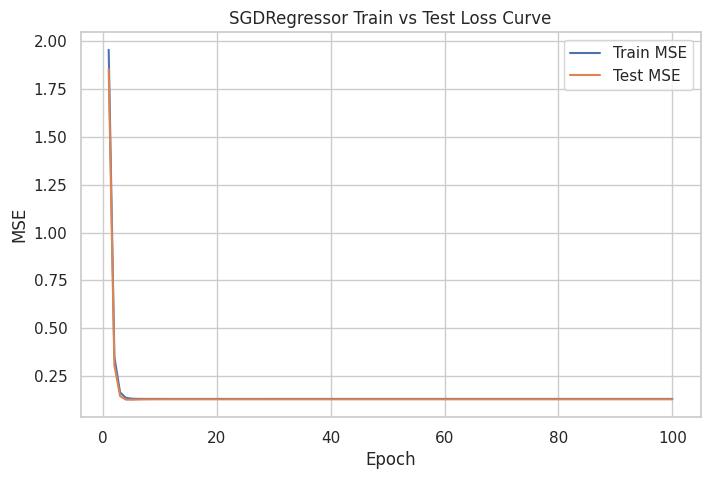

In [ ]:
# 5) Train Linear Regression with Gradient Descent (SGDRegressor)
# - We will perform manual epochs using partial_fit and record train/test MSE per epoch for plotting loss curves.


# %%
n_epochs = 100
sgd = SGDRegressor(loss='squared_error', learning_rate='invscaling', eta0=0.01,
random_state=42, max_iter=1, warm_start=True, penalty='l2')


train_loss = []
test_loss = []


for epoch in range(n_epochs):
    sgd.partial_fit(X_train_scaled, y_train)
    y_tr_pred = sgd.predict(X_train_scaled)
    y_te_pred = sgd.predict(X_test_scaled)
    train_loss.append(mean_squared_error(y_train, y_tr_pred))
    test_loss.append(mean_squared_error(y_test, y_te_pred))
    if epoch % 10 == 0:
      print(f'Epoch {epoch}: train_mse={train_loss[-1]:.4f} test_mse={test_loss[-1]:.4f}')


print('Final SGD Test RMSE:', np.sqrt(mean_squared_error(y_test, sgd.predict(X_test_scaled))))
print('Final SGD R2:', r2_score(y_test, sgd.predict(X_test_scaled)))


# Plot loss curve
plt.figure(figsize=(8,5))
plt.plot(range(1, n_epochs+1), train_loss, label='Train MSE')
plt.plot(range(1, n_epochs+1), test_loss, label='Test MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('SGDRegressor Train vs Test Loss Curve')
plt.legend()
plt.show()

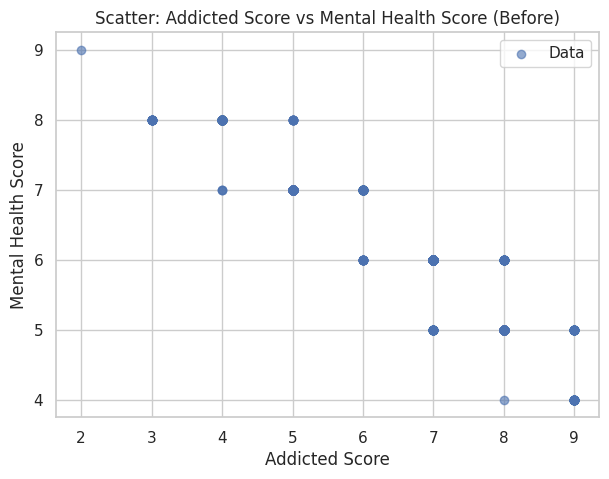

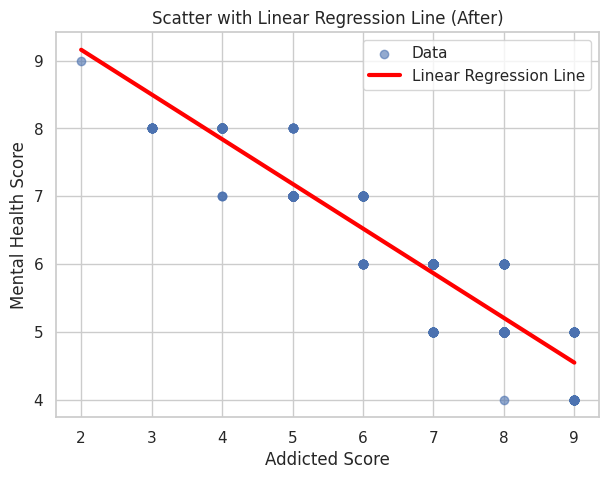

In [ ]:
# 6) Scatter plots: BEFORE and AFTER showing linear regression line


# %%
# BEFORE (raw)
plt.figure(figsize=(7,5))
plt.scatter(X['Addicted_Score'], y, alpha=0.6, label='Data')
plt.xlabel('Addicted Score')
plt.ylabel('Mental Health Score')
plt.title('Scatter: Addicted Score vs Mental Health Score (Before)')
plt.legend()
plt.show()


# AFTER: add regression line from lin_reg
# For smooth line, sort X for plotting
xs = np.array(sorted(X['Addicted_Score']))
ys_line = lin_reg.predict(xs.reshape(-1,1))


plt.figure(figsize=(7,5))
plt.scatter(X['Addicted_Score'], y, alpha=0.6, label='Data')
plt.plot(xs, ys_line, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel('Addicted Score')
plt.ylabel('Mental Health Score')
plt.title('Scatter with Linear Regression Line (After)')
plt.legend()
plt.show()




In [ ]:
# 7) Train Decision Tree and Random Forest (for comparison)

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)


rf = RandomForestRegressor(random_state=42, n_jobs=-1)
param_grid = {'n_estimators':[50,100], 'max_depth':[3,5,None], 'min_samples_split':[2,5]}
gs = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
gs.fit(X_train, y_train)


best_rf = gs.best_estimator_
print('RandomForest best params:', gs.best_params_)


y_rf = best_rf.predict(X_test)

RandomForest best params: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Evaluate all models
results = {}
results['LinearRegression'] = {'MSE': mean_squared_error(y_test, y_pred_lr), 'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr)), 'R2': r2_score(y_test, y_pred_lr)}
results['SGD'] = {'MSE': mean_squared_error(y_test, sgd.predict(X_test_scaled)), 'RMSE': np.sqrt(mean_squared_error(y_test, sgd.predict(X_test_scaled))), 'R2': r2_score(y_test, sgd.predict(X_test_scaled))}
results['DecisionTree'] = {'MSE': mean_squared_error(y_test, y_dt), 'RMSE': np.sqrt(mean_squared_error(y_test, y_dt)), 'R2': r2_score(y_test, y_dt)}
results['RandomForest'] = {'MSE': mean_squared_error(y_test, y_rf), 'RMSE': np.sqrt(mean_squared_error(y_test, y_rf)), 'R2': r2_score(y_test, y_rf)}

pd.DataFrame(results).T

,MSE,RMSE,R2
LinearRegression,0.128602,0.358611,0.892880
SGD,0.128721,0.358776,0.892781
DecisionTree,0.131479,0.362601,0.890483
RandomForest,0.131492,0.362618,0.890473


In [ ]:
# The Linear regression has the lowest mse, the least loss, so it is the best model.
#Saving the best model: linear regression
joblib.dump(lin_reg, 'models/lin_reg.pkl')

['models/lin_reg.pkl']

In [ ]:
files.download("/content/models/lin_reg.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Script for prediction
model = joblib.load("/content/models/lin_reg.pkl")

def predict_mental_health(addicted_score: float):
    """
    Takes in an addiction score (1–10) and returns
    the predicted mental health score.
    """
    input_data = np.array([[addicted_score]])
    prediction = model.predict(input_data)[0]
    return prediction

# Example usage
if __name__ == "__main__":
    user_input = float(input("Enter Addicted Score (1–10): "))
    result = predict_mental_health(user_input)
    print(f"Predicted Mental Health Score: {result:.2f}")

Enter Addicted Score (1–10): 8
Predicted Mental Health Score: 5.21
